In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Membaca File Dataset**

In [61]:
data = pd.read_excel("https://github.com/ShinyQ/Tugas-Pengantar-AI-2_Fuzzy_Logic/blob/main/restoran.xlsx?raw=true")
data.sample(5)

,id,pelayanan,makanan
94,95,63,8
53,54,64,10
19,20,49,10
2,3,98,2
1,2,54,1


# **Fuzzifikasi**

## **Membership Function**

#### **Membership Function Makanan**
##### 1 - 3  = Tidak Enak
##### 4 - 7 = Enak
##### 8 - 10 = Sangat Enak 

In [62]:
def fuzzy_makanan(x):
    makanan = {'Tidak Enak': 0, 'Enak': 0, 'Sangat Enak': 0}

    if x <= 3:
        makanan['Tidak Enak'] = 1
    if 4 <= x <= 7:
        makanan['Enak'] = 1
    if x >= 8:
        makanan['Sangat Enak'] = 1
            
    if 3 < x <= 4:
        makanan['Tidak Enak'] = -(x - 4) / (4 - 3)
    if 3 < x < 4:
        makanan['Enak'] = (x - 3) / (4 - 3)
    if 6 < x <= 8:
        makanan['Enak'] = -(x - 8) / (8 - 6)
    if 6 < x < 8:
        makanan['Sangat Enak'] = (x - 6) / (8 - 6)
        
    return makanan

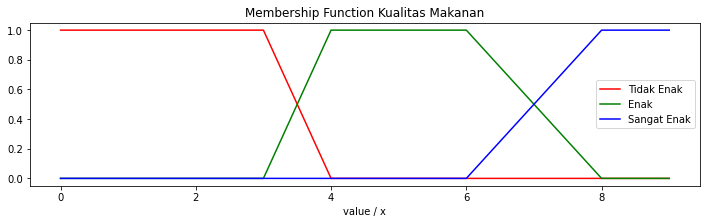

In [63]:
plt.figure(figsize=(12, 3))
plt.title("Membership Function Kualitas Makanan")
plt.plot(range(10), [fuzzy_makanan(x)['Tidak Enak'] for x in range(10)], 'r')
plt.plot(range(10), [fuzzy_makanan(x)['Enak'] for x in range(10)], 'g')
plt.plot(range(10), [fuzzy_makanan(x)['Sangat Enak'] for x in range(10)], 'b')

plt.plot(0, 0, 'r', linewidth=1.5, label='Tidak Enak')
plt.plot(0, 0, 'g', linewidth=1.5, label='Enak')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Enak')

plt.xlabel("value / x")
plt.legend()
plt.show()

#### **Membership Function Pelayanan**
##### 1 - 35  = Kurang
##### 36 - 70 = Baik
##### 71 - 100 = Sangat Baik

In [64]:
def fuzzy_pelayanan(x):
    pelayanan = {'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}

    if x <= 35:
        pelayanan['Kurang'] = 1
    if 36 <= x <= 70:
        pelayanan['Baik'] = 1
    if x >= 71:
        pelayanan['Sangat Baik'] = 1
            
    if 35 < x <= 36:
        pelayanan['Kurang'] = -(x - 36) / (36 - 35)
    if 35 < x < 36:
        pelayanan['Baik'] = (x - 35) / (36 - 35)
    if 70 < x <= 71:
        pelayanan['Baik'] = -(x - 71) / (71 - 70)
    if 70 < x < 71:
        pelayanan['Sangat Baik'] = (x - 70) / (71 - 70)
        
    return pelayanan

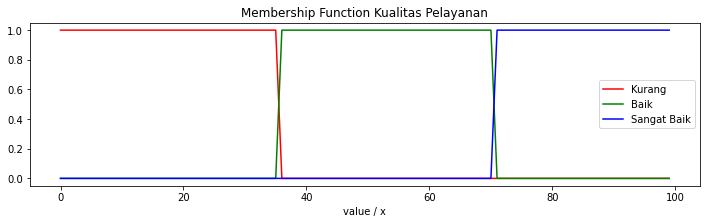

In [65]:
plt.figure(figsize=(12, 3))
plt.title("Membership Function Kualitas Pelayanan")

plt.plot(range(100), [fuzzy_pelayanan(x)['Kurang'] for x in range(100)], 'r')
plt.plot(range(100), [fuzzy_pelayanan(x)['Baik'] for x in range(100)], 'g')
plt.plot(range(100), [fuzzy_pelayanan(x)['Sangat Baik'] for x in range(100)], 'b')

plt.plot(0, 0, 'r', linewidth=1.5, label='Kurang')
plt.plot(0, 0, 'g', linewidth=1.5, label='Baik')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Baik')

plt.xlabel("value / x")
plt.legend()
plt.show()

## **Proses Fuzzifikasi**

In [66]:
fuzzify = []

for pelayanan, makanan in zip(data['pelayanan'], data['makanan']):
    fuzzy = {'Pelayanan': 0, 'Makanan': 0}

    fuzzy['Pelayanan'] = fuzzy_pelayanan(pelayanan)
    fuzzy['Makanan'] = fuzzy_makanan(makanan)

    fuzzify.append(fuzzy)

# **Inferensi**

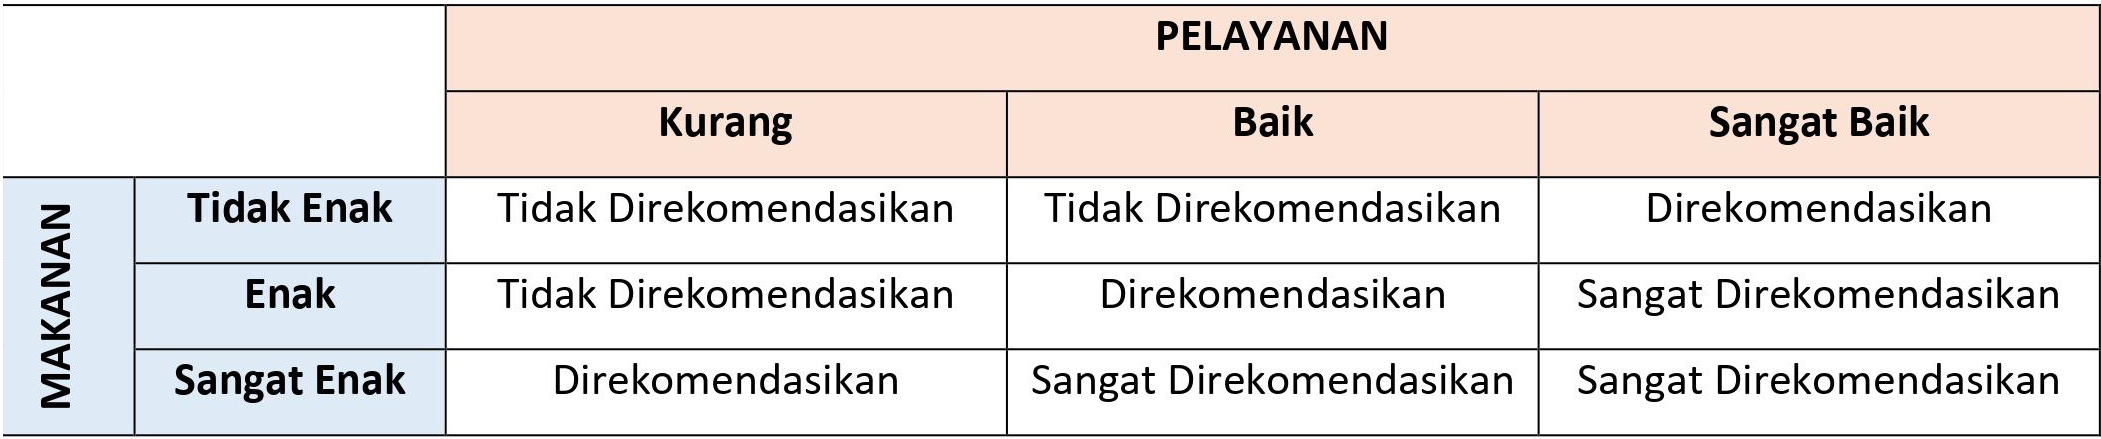

In [67]:
fuzzy_rules = {
    ('Tidak Enak', 'Kurang') : 'Tidak Direkomendasikan',
    ('Tidak Enak', 'Baik') : 'Tidak Direkomendasikan',
    ('Tidak Enak', 'Sangat Baik') : 'Direkomendasikan',
    ('Enak', 'Kurang') : 'Tidak Direkomendasikan',
    ('Enak', 'Baik') : 'Direkomendasikan',
    ('Enak', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Sangat Enak', 'Kurang') : 'Direkomendasikan',
    ('Sangat Enak', 'Baik') : 'Sangat Direkomendasikan',
    ('Sangat Enak', 'Sangat Baik') : 'Sangat Direkomendasikan',
}

In [68]:
inference_result = []

def inference(fuzzed):
    result = {'Tidak Direkomendasikan': 0, "Direkomendasikan": 0, "Sangat Direkomendasikan": 0}

    for Pelayanan in fuzzed['Pelayanan'].keys():
        for Makanan in fuzzed['Makanan'].keys():
            min_value = min(fuzzed['Makanan'][Makanan], fuzzed['Pelayanan'][Pelayanan])
            output = fuzzy_rules[(Makanan, Pelayanan)]

            if min_value > result[output]:
               result[output] = min_value

    return result

for fuzzed in fuzzify:
    inference_result.append(inference(fuzzed))

inference_result[0], inference_result[-1]

({'Direkomendasikan': 0.5,
  'Sangat Direkomendasikan': 0.5,
  'Tidak Direkomendasikan': 0},
 {'Direkomendasikan': 1,
  'Sangat Direkomendasikan': 0,
  'Tidak Direkomendasikan': 0})

# **Defuzzifikasi**

In [ ]:
def defuzzification():

# **Hasil**